# 제주 출입국 분석

In [65]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.3, 0.3, '한글')

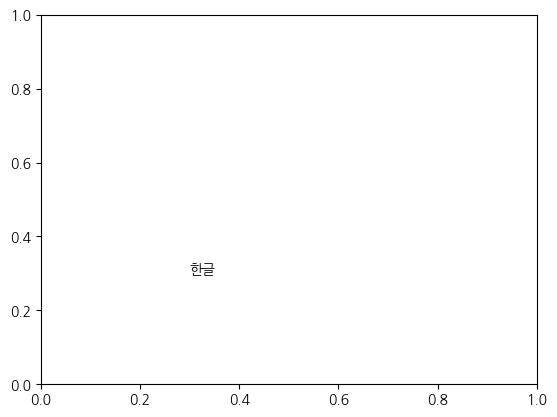

In [66]:
# 윈도우용 폰트 경로 설정
path="C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글')

In [67]:
# csv 파일 임포트
file_path = "./ref/출입국_제주.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
# ori.head()
ori.tail()

,출입국항별,내외국인별,성별,시점,항목,데이터
19,제주,외국인,여자,2019,입국자,5599
20,제주,외국인,여자,2020,입국자,688
21,제주,외국인,여자,2021,입국자,0
22,제주,외국인,여자,2022,입국자,422
23,제주,외국인,여자,2023,입국자,3709


In [68]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]
# ex1_data.rename(columns=("",""))
ex1_data

,airport,type1,gender,year,type2,value
0,제주,내국인,남자,2018,입국자,575
1,제주,내국인,남자,2019,입국자,545
2,제주,내국인,남자,2020,입국자,445
3,제주,내국인,남자,2021,입국자,1
4,제주,내국인,남자,2022,입국자,116
5,제주,내국인,남자,2023,입국자,176
6,제주,내국인,여자,2018,입국자,773
7,제주,내국인,여자,2019,입국자,726
8,제주,내국인,여자,2020,입국자,543
9,제주,내국인,여자,2021,입국자,0


In [69]:
# 필터제작
filter1 = ex1_data['type1']=='내국인'
ex2_data = ex1_data[filter1].copy()
ex2_data.head()

,airport,type1,gender,year,type2,value
0,제주,내국인,남자,2018,입국자,575
1,제주,내국인,남자,2019,입국자,545
2,제주,내국인,남자,2020,입국자,445
3,제주,내국인,남자,2021,입국자,1
4,제주,내국인,남자,2022,입국자,116


In [70]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head(10)

,year,total
0,2018,14768
1,2019,11974
2,2020,2312
3,2021,1
4,2022,887
5,2023,8403


<Axes: title={'center': '2010-2023년 제주 입출국 내국인 차트'}>

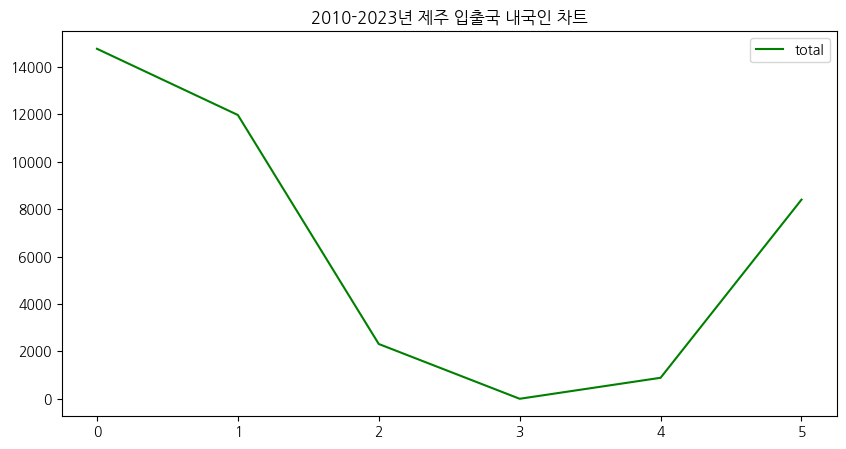

In [71]:
ex1_data.plot(y='total', figsize=(10, 5), title="2010-2023년 제주 입출국 내국인 차트", color='green')

In [72]:
filter2 = ex2_data['gender']=='남자'
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['gender']=='여자'
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")

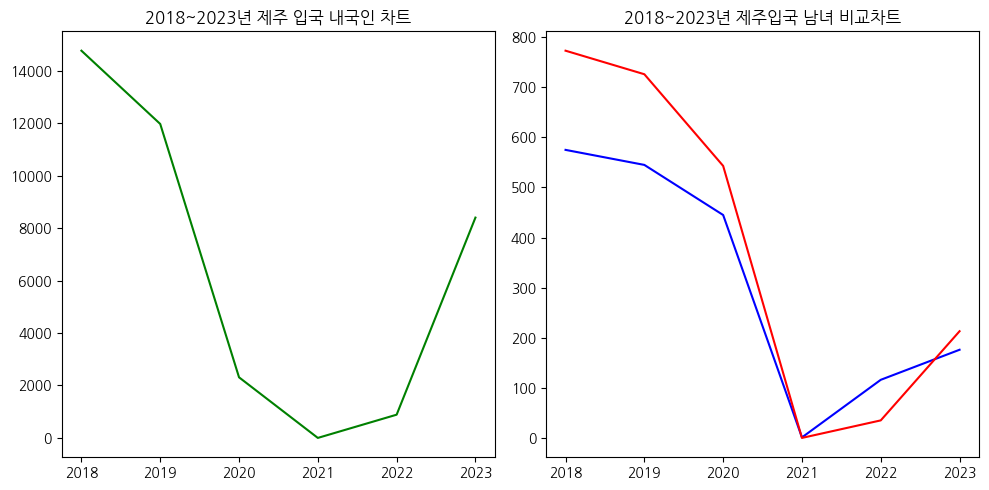

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig , axs = plt.subplots(ncols=2,figsize=(10,5)) # 2 x 2 서브플롯 생성

axs[0].plot(ex1_data['year'], ex1_data['total'], color='g') 
axs[1].plot(ex2_data['year'], ex2_data['total'], color='b')  
axs[1].plot(ex3_data['year'], ex3_data['total'], color='r')

axs[0].set_title("2018~2023년 제주 입국 내국인 차트")
axs[1].set_title("2018~2023년 제주입국 남녀 비교차트")

plt.tight_layout()
plt.show()